In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import ConvexHull

In [40]:
connec = np.array([
    [1,1,0,1,1,0,0,0],
    [1,1,1,0,0,1,0,0],
    [0,1,1,1,0,0,1,0],
    [1,0,1,1,0,0,0,1],
    [1,0,0,0,1,1,0,1],
    [0,1,0,0,1,1,1,0],
    [0,0,1,0,0,1,1,1],
    [0,0,0,1,1,0,1,1],
],dtype=bool)

coords = np.array([
  [-.5,  .5,  .5],
  [-.5,  .5, -.5],
  [ .5,  .5, -.5],
  [ .5,  .5,  .5],
  [-.5, -.5,  .5],
  [-.5, -.5, -.5],
  [ .5, -.5, -.5],
  [ .5, -.5,  .5],
  ], dtype=float)




In [109]:
binary = 0b00001111

bin_array = []
for i in range(7,-1,-1):
    bin_array.append(binary & 2**i)

bits= np.array(bin_array,dtype=bool).reshape((1,8))

answer = bits * (bits * connec).T
# answer = np.col((bits * connec).T, [2,4,7]).nodup()

answer = np.array(answer,dtype=int)
# print(answer)

groups = dict([(elem.argmax() ,elem) for elem in answer if elem.any() ])
print(groups)


[[False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False  True  True False  True]
 [False False False False  True  True  True False]
 [False False False False False  True  True  True]
 [False False False False  True False  True  True]]
{4: array([0, 0, 0, 0, 1, 0, 1, 1]), 5: array([0, 0, 0, 0, 0, 1, 1, 1])}


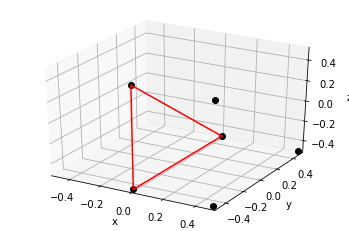

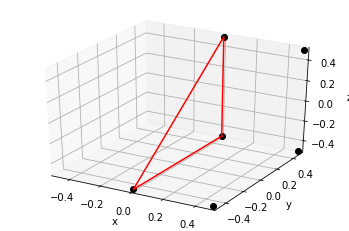

In [107]:
for group in groups:
    bit_connec = (1 - bits) * (groups[group] * connec).T
    mid_indices = bit_connec.nonzero()
    mid_pos = np.array(list(zip(coords[mid_indices[0]], coords[mid_indices[1]])))
    roots_indices = groups[group].nonzero()
    mid_pos = np.concatenate((np.mean(mid_pos,axis=1), coords[roots_indices]))
    
    hull = ConvexHull(mid_pos)     
    fig = plt.figure()
    ax = fig.add_subplot(111, projection="3d")
    ax.plot(mid_pos.T[0], mid_pos.T[2], mid_pos.T[1], "ko")
    ax.set_xlim(-0.5, 0.5)
    ax.set_ylim(-0.5, 0.5)
    ax.set_zlim(-0.5, 0.5)
    
    no_no = hull.vertices[-len(roots_indices[0]):]
    for s in hull.simplices:
        if np.isin(s, no_no).any():
            continue
        s = np.append(s, s[0])  # Here we cycle back to the first coordinate
        ax.plot(mid_pos[s, 0], mid_pos[s, 2], mid_pos[s, 1], "r-")

    for i in ["x", "y", "z"]:
        eval("ax.set_{:s}label('{:s}')".format(i, i))

    plt.show()